

<h1 style="text-align: center;">Física Computacional: Corpos em Queda Livre</h1>

<p style='text-align: center;'>Autores: Gustavo H. Sahd</p>

---

<h2 style="text-align: center;">Cálculo Numérico: Método de Euler$^{[1][3]}$</h2>

---

<p style="text-align: justify;">Mesmo existindo diversos métodos analíticos para resolução de EDOs, ainda assim existem equações que se faz necessário a utilização de métodos numéricos para se obter sua resolução. Esses métodos fornecem soluções em forma de tabelas de números $(x_0,y_0),(x_1,y_1)...(x_n,y_n)$. Em um procedimento numérico, basicamente o que acontece é a substituição de um problema com variáveis contínuas por outro problema envolvendo variáveis discretas. O Método de Euler é o procedimento mais simples, mas ele mostra as dificuldades que surgem ao se resolver uma EDO numericamente. Considere um problema de valor inicial descrito pelas equações abaixo:</p>


$$
  y'=f(x,y)\\
  y(x_0)=y_0
$$

<p style="text-align: justify;">Conhecendo os valores de $x_0$ e $y_0$ é possível determinar o coeficiente angular da reta tangente a $y$ no ponto $x_0$, determinando dessa forma $y_{0}'=f(x_0,y_0)$. Conhecendo o coeficiente angular, constroi-se uma reta tangente à solução $y$ no ponto $x_0$, seguindo sobre a reta tangente até encontrar a reta $x=x_1$, determina-se o valor aproximado $y_1$ de $y$ em $x_1$. Tendo assim:</p>

$$
  y_1=y_0+y_{0}'(x_1-x_0)\\
  y_1=y_0+f(x_0,y_0)(x_1-x_0)
$$

<p style="text-align: justify;">Ao ser determinado o valor de $y_1$, calcula-se o valor aproximado do coeficiente angular da tangente, $y_{1}'=f(x_1,y_1)$, a $y$ no ponto $x_1$. Através disso encontra-se o valor de $y_2$.
</p>

$$
    y_2=y_1+f(x_1,y_1)(x_2-x_1)
$$

<div style="text-align: center;">
<img src=https://i.imgur.com/7QXv9Hh.png
width="330px" height="200px">
</div>

<p style="text-align: justify;">Continuando sucessivamente, chega-se a:</p>

$$
y_{n+1}=y_n+f(x_n,y_n)(x_{n+1}-x_n)
$$

<p style="text-align: justify;">Se escolher um espaçamento constante para se efetuar o cálculo, isto é, se $x_{n+1}-x_n=h$, para $n=0,1,2,...$, obtém-se a Fórmula de Euler.</p>

$$
  y_{n+1}=y_n+h\cdot f(x_n,y_n)\\
  x_{n+1}=x_{n}+h
$$

<p style="text-align: justify;">Abaixo está implementado o Método de Euler computacionalmente através da linguagem de programação Python, na primeira célula foi importado as bibliotecas que serão utilizadas durante o código: <code>numpy</code> possuí recursos fundamentais para o cáclulo numérico, <code>matplotlib</code> é usada para plotagem de gráficos e a biblioteca <code>pandas</code> é usada para tratamento de dados atraves de DataFrames</p>

In [ ]:
# importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<p style="text-align: justify;">Foi definido uma função <code>euler</code> que depende dos seguintes parâmetros <code>(f, v0, t0, tf, n)</code> onde <code>f</code> é a função a ser aplicado o método, <code>v0</code> é a velocidade inicial do corpo, <code>tf</code> e <code>t0</code> são respectivamente tempo final e tempo inicial e <code>n</code> é o número de passos a serem tomados no Método de Euler. O parâmetro <code>h</code> é definido como a diferença entre os tempos inicial e final, divididos pelo npumeros de passos a serem tomados, o comando <code>t = np.linspace(t0, tf, n+1)</code> vai criar um vetor com tamanho <code>n+1</code>contendo valores igualmente espaçados entre <code>t0</code> e <code>tf</code>.</p>
<p style="text-align: justify;">Os comandos <code>v = np.zeros(n+1)</code> e <code>v[0] = v0</code> criam um vetor de tamanho <code>n+1</code> onde o primeiro termo vale <code>v0</code> e os seguintes valem 0, em seguida é implemetado o método de Euler dentro de um laço for e a função irá nos retornar 3 valores: <code>t, v, h</code>.</p>

In [ ]:
# definindo o método de euler
def euler(f, v0, t0, tf, n):
    h = (tf - t0) / n
    t = np.linspace(t0, tf, n+1)
    v = np.zeros(n+1)
    v[0] = v0

    for i in range(n):
        v[i+1] = v[i] + h * f(v[i])

    return t, v, h

---

<h2 style="text-align: center;">Corpos em Queda Livre: Velocidade$^{[2]}$</h2>

---

<p style="txt-align: justify;">Um dos problemas mais comuns da física é o problema dos corpos em queda livre, quando um corpo está próximo à superfície terrestre, com a resistência do ár desprezada, ele fica sob a ação de uma força constante:</p>

$$
F=mg
$$

<p style="text-align: justify;">a direção positiva do movimento considerado é para baixo, portanto a equação de movimento é:</p>

$$
m\frac{d^{2}x}{dt^{2}}=mg
$$

<p style="text-align:justify;">Incluindo os efeitos de uma resistência do ár proporcional a $v$, a força total que atuará nos corpos em queda livre será:</p>

$$
F=mg-bv
$$

<p style="text-align: justify;">A constante $b$ depende da densidade e da forma do material que forma o corpo em queda, assim como também da viscosidade do fluído em que o corpo esta imerso. Como a resistência do ár é uma força dependente da velocidade, teremos uma força do tipo $F(v)$</p>

$$
m\frac{dv}{dt}=mg-bv
$$

<p style="text-align: justify">Tomando $v_{0}=0$ em $t=0$, a solução analítica desse problema pode ser encontrado atraves do seguinte método:</p>

$$
\int_{0}^{v}\frac{dv}{v+(mg/b)}=-\frac{bt}{m}
$$

<p style="text-align: justify;">Aplicando o método a nossa equação de movimento, encontramos uma solução do tipo:</p>

$$
v=\frac{mg}{b}(1-e^{-bt/m})
$$

>---
><h2 style='text-align: center;'>Desenvolvimento da Solução Analítica</h2>
>
>---
>$$\int_{0}^{v} \frac{dv}{mg-bv} = \frac{t}{m}$$
>
>Pelo método da substituição temos:
>
>$$u = mg - bv \\ du = -bdv$$
>
>Portanto a integral fica:
>
>$$\int_{mg}^{mg-bv}-\frac{du}{ub}= \frac{t}{m}$$
>\
>$$-\frac{1}{b}\int_{mg}^{mg-bv}\frac{du}{u} = \frac{t}{m}$$
>\
>$$\int_{mg}^{mg-bv}\frac{du}{u} = -\frac{bt}{m}$$
>\
>$$ln(u)|_{mg}^{mg-bv} = -\frac{bt}{m}$$
>\
>$$ln(\frac{mg-bv}{mg}) = -\frac{bt}{m}$$
>\
>$$ln(1 - \frac{bv}{mg}) = -\frac{bt}{m}$$
>\
>$$1 - \frac{bv}{mg} = e^{-bt/m}$$
>\
>$$v = \frac{mg}{b}(1 - e^{-bt/m})$$

---

<h3 style="text-align: center">Corpos em Queda Livre: Solução Numérica$^{[1][2]}$</h3>

---

<p style="text-align: justify;">Já conheceindo a equação de movimento dos corpos em queda livre é possível determinar uma Equação Diferencial Ordinária (EDO) que determinará a solução para o problema, a equação para o caso da velocidade dos corpos em queda livre será:</p>

$$
v'-g+\frac{b}{m}v=0
$$

<p style="text-align: justify;">Abaixo estão definidos as contantes <code>m</code>, <code>g</code> e <code>b</code> e as funções <code>fv</code> e <code>fvr</code>, a primeira é a EDO a ser solucionada pelo Método de Euler e a segunda é a solução analítica para o problema.</p>

In [ ]:
# definindo as constantes e as funções
m = 80.0
g = 9.80
b = 0.47

def fv(v):
    return g - (b * v) / m

def fvr(t):
    return (m*g/b)*(1-np.exp(-t*b/m))

<p style="text-align: justify;">Ao chamar a função <code>euler</code> para solucionar a EDO <code>fv</code> ela nos retorna os valores de <code>t, v, h</code> e armazena os valores da solução analítica na variável <code>real_v</code>, em seguida atraves da biblioteca <code>padas</code> é gerado uma tabela com os 10 primeiros pontos das duas soluções para fins comparativos usando a função <code>DataFrame</code>.</p>

In [ ]:
# gerar uma tabela com a biblioteca panda
t, v, h = euler(fv, 0.0, 0.0, 1000, 2000)
real_v = fvr(t)

data = {'v real': real_v, 'Euler': v, 'h': h, 'erro': abs(v-real_v)}
pd.DataFrame(data).head(10)

,v real,Euler,h,erro
0,0.000000,0.000000,0.5,0.000000
1,4.892810,4.900000,0.5,0.007190
2,9.771269,9.785606,0.5,0.014337
3,14.635418,14.656861,0.5,0.021443
4,19.485300,19.513807,0.5,0.028507
5,24.320956,24.356485,0.5,0.035529
6,29.142428,29.184938,0.5,0.042510
7,33.949758,33.999207,0.5,0.049449
8,38.742987,38.799334,0.5,0.056347
9,43.522157,43.585361,0.5,0.063204


---

<h3 style="text-align: center;">Corpos em Queda Livre: Velocidade Terminal$^{[1][2]}$</h3>

---

<p style="text-align: justify">Ao analisar a solução analítica para o problema dos corpos em queda livre, pode-se perceber que quando $t \rightarrow \infty$, a velocidade tenderá a $v=mg/b$. reescrevendo a expressão ficará mais fácil de visualizar isso:</p>

$$
v=\frac{mg}{b} - \frac{mg}{b}\cdot\frac{1}{e^{bt/m}}
$$

<p style="text-align: justify;">Aplicando o limite na expressão acima, temos:</p>

$$
\lim_{t\rightarrow\infty}\frac{mg}{b} - \frac{mg}{b}\cdot\frac{1}{e^{bt/m}}=\frac{mg}{b}
$$

<p style="text-align: justify;">A velocidade $mg/b$ é chamada de velocidade terminal, e um corpo alcança essa velocidade quando as forças gravitacionais e de resistência de ár se equilibram.

In [ ]:
# verificando a velocidade limite
vl=[g*m/b]*len(t)

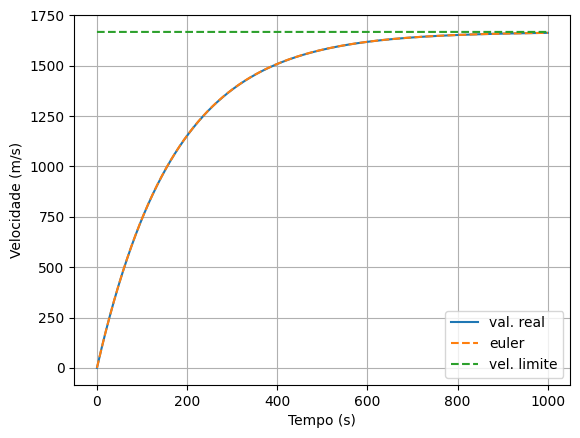

In [ ]:
# gerar um gráfico com a biblioteca matplotlib
plt.plot(t, real_v,label='val. real')
plt.plot(t, v,'--',label='euler')
plt.plot(t, vl, '--',label='vel. limite')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.title('Velocidade em Função do Tempo')
plt.grid()
plt.legend()
plt.show()

<p style='text-align: justify;'>Graficamente pode-se viualizar a velocidade limite, representada pelo pontilhado laranja, percebe-se que conforme o tempo aumenta mais próximo da velocidade limite os corpos chegam, corroborando a tese de que conforme o tempo tende ao infinito a velocidade dos corpos em queda se mantém constantes após um equilíbrio entre a força gravitacional e a força de arraste do ár.</p>

---

<h2 style='text-align: center;'>Scipy: Ordinary Diferential Equation Integration (odeint)$^{[4]}$</h2>

---

<p style='text-align: justify;'>A biblioteca <code>scipy</code> juntamente com a <code>numpy</code> fornece suporte para execução de tarefas científicas, ela disponibiliza suporte a integração numérica, transformada de Fourier, algebra linear entre outras áreas importantes do cálculo. Além disso o módulo utilizado no código abaixo <code>scipy.integrate</code> fornece a função <code>odeint</code> que é muito utilizada para resolução de EDO's.</p>

In [ ]:
# importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [ ]:
# definindo as funções e suas constantes
m = 80.0
g = 9.80
b = 0.47

def fv(v, t, b, g, m):
    return g - (b * v) / m

def v(t):
    return (m*g/b)*(1-np.exp(-t*b/m))

<p style='text-align: justify;'>Os métodos utilizados pelo <code>odeint</code> são majoritariamente o LSODA e em alguns casos o método Adams-Bashforth-Moulton. O método LSODA é um passo adaptativo, poís utiliza desde métodos explícitos, aqueles que dependem de um ponto anterior para calcular o próximo ponto (como o Método de Euler), quanto métodos implícitos, aqueles que dependem de uma equação algébrica para serem determinados os pontos. A escolha desses métodos depende do tipo de EDO a ser solucionada, e a função <code>odeint</code> aplica o melhor método para a EDO selecionada.</p>

In [ ]:
# chamando a função odeint
t = np.linspace(0, 1000, 2000)
v0 = 0.0

sol = odeint(fv, v0, t, args=(b, g, m))
v_ = v(t)

In [ ]:
# verificando a velocidade limite
vl=[g*m/b]*len(t)

In [ ]:
# criando tabela de dados
data_1 = {'v real': sol, 'Euler': v_, 'erro': abs(sol-v_)}
pd.DataFrame(data).head(10)

,v real,Euler,h,erro
0,0.000000,0.000000,0.5,0.000000
1,4.892810,4.900000,0.5,0.007190
2,9.771269,9.785606,0.5,0.014337
3,14.635418,14.656861,0.5,0.021443
4,19.485300,19.513807,0.5,0.028507
5,24.320956,24.356485,0.5,0.035529
6,29.142428,29.184938,0.5,0.042510
7,33.949758,33.999207,0.5,0.049449
8,38.742987,38.799334,0.5,0.056347
9,43.522157,43.585361,0.5,0.063204


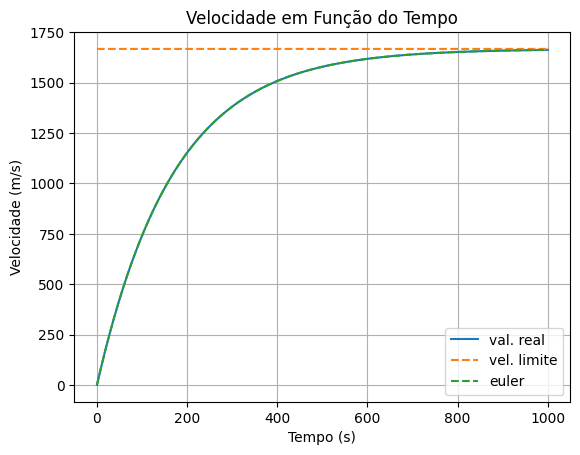

In [ ]:
# plotando o gráfico
plt.plot(t,v_,label='val. real')
plt.plot(t,vl,'--',label='vel. limite')
plt.plot(t, sol, '--',label='euler')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.title('Velocidade em Função do Tempo')
plt.legend()
plt.grid()
plt.show()

---

<h2 style="text-align: center;">Referências Bibliográficas:</h2>

---
* [1] WATARI, K. **Mecânica Clássica, Volume 1**. 2. ed. São Paulo, SP: Livraria da Física USP, 2004;
* [2] SYMON, K. R. **Mecânica: tradução de Gilson Brand Btista**. 1. ed. Rio de Janeiro, RJ: Editora Campus, 1996;
* [3] Valle, K. N. F. **Métodos Numéricos de Euler e Runge-Kutta**. Belo Horizonte,MG: Repositório UFMG, 2012;
* [4] SCIPY. **scipy.integrate.odeint**, 2023. Disponível em <[Documentação odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)>.
